# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [10]:
import pandas as pd
import numpy as np

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies':[10,1,5,9,4,2,9,6,0,3] })
student_data.set_index('StudentID', inplace = True)
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

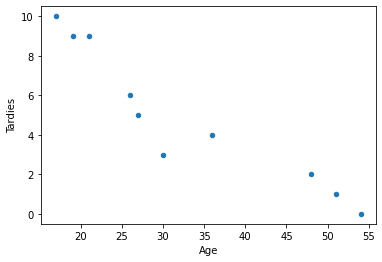

In [9]:
# Your code here.
student_data.plot.scatter(x = 'Age', y = 'Tardies');

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here.
#Se ve una relación inversamente proporcional entre la edad y el numero de retrasos, es decir, entre más joven, mayor es la cantidad de retrazos.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [16]:
# Your response here.
print(f'La covarianza es: {student_data.cov()["Age"][1]}\n La correlación es {student_data.corr()["Age"][1]}')

La covarianza es: -45.56666666666666
 La correlación es -0.9391626886887121


In [19]:
#La covarianza, al ser negativa, nos indica que los datos se mueven de forma inversa. No nos entrega mayores antecedentes.
#La correlación, en cambio, además de indicarnos que los datos se mueven de forma inversa, nos indica que hay una alta relación entre la edad y el numero de retrasos.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [20]:
# Your response here.
import statsmodels.api as sm

In [22]:
X = sm.add_constant(student_data.Age)
Y = student_data.Tardies
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 24 Jul 2022   Prob (F-statistic):           5.57e-05
Time:                        19:51:25   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\fezun\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#Mi variable outcome será el número de retrasos.
#Estoy usando una regresión lineal ya que los datos parecen tener ese tipo de relación.

Plot your regression model on your scatter plot.

Text(0, 0.5, 'Tardies')

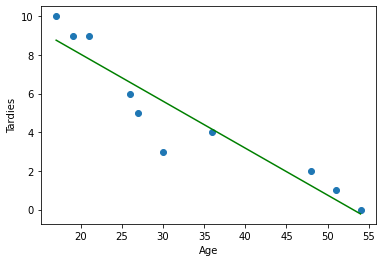

In [29]:
slope= -0.2428
intercept = 12.8888
plt.scatter(student_data.Age, student_data.Tardies)
x = [student_data.Age.min(),student_data.Age.max()]
y = [student_data.Age.min()*slope +intercept,student_data.Age.max()*slope + intercept]
plt.plot(x,y, color='g')
plt.xlabel('Age')
plt.ylabel('Tardies')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [30]:
# Your response here. 
#De acuerdo a los resultados, diría que la edad si es un buen predictor del numero de retrazos de los alumnos.
#Tenemos un valor de r-cuadrado muy alto (0.8) lo que nos indicaría que nuestro modelo captura el 80% de la varianza de nuestros datos

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [31]:
# Import any libraries you may need & the data

autos= pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [38]:
# Your response here.
y = autos['CO2 Emission Grams/Mile']
autos_var = autos[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
autos_var.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


In [40]:
#Las variables que mayor correlación presentan son: Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year'.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [44]:
# Your response here.
x=sm.add_constant(autos[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']])
y = autos['CO2 Emission Grams/Mile']
modelo_autos = sm.OLS(y, x).fit()

C:\Users\fezun\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Estoy usando una regresión lineal

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [45]:
# Your response here. 
print(modelo_autos.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 24 Jul 2022   Prob (F-statistic):               0.00
Time:                             20:16:45   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [ ]:
#De acuerdo a nuestro modelo de regresión, podría decir que la variable Fuel Barrels/Year es la que más afecta la emisión de CO2 ya que es la que 
#tiene un coeficiente mayor, por lo tanto afecta el resultado de CO2 en una mayor proporción.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [47]:
# Your code here.
parties = pd.DataFrame({'X':[1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})
parties

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

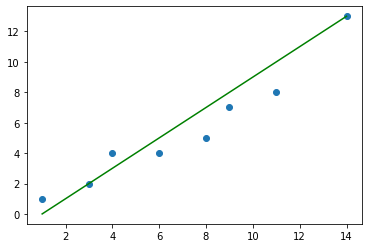

In [53]:
# Your code here.
plt.scatter(parties.X, parties.Y)
x = [parties.X.min(),parties.X.max()]
y = [parties.X.min()*1 -1,parties.X.max()*1 -1]
plt.plot(x,y, color='g')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 